In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

import os
import sys
import re
import random
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.types import *
from pyspark.sql import Row
from pyspark.sql.functions import *

# Evaluation Metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as rs
from sklearn.metrics import mean_absolute_error as mae

# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV



HERE I HAVE CREATED A FUNCTION TO CALL FOR LOADING DATA, THIS WAY DIFFERENT VARIABLES CAN EASILY BE ASSIGNED TO DIFFERENT DIMENSIONS OF THE DATA BEING USED

In [182]:
def get_data(name,lim):
    
   fetch_data = pd.read_csv(name)
   return fetch_data

In [183]:
#LOAD DATABASE

df = get_data('execution_database.csv',1)
df = df.dropna() #Drops missing values in the dataset


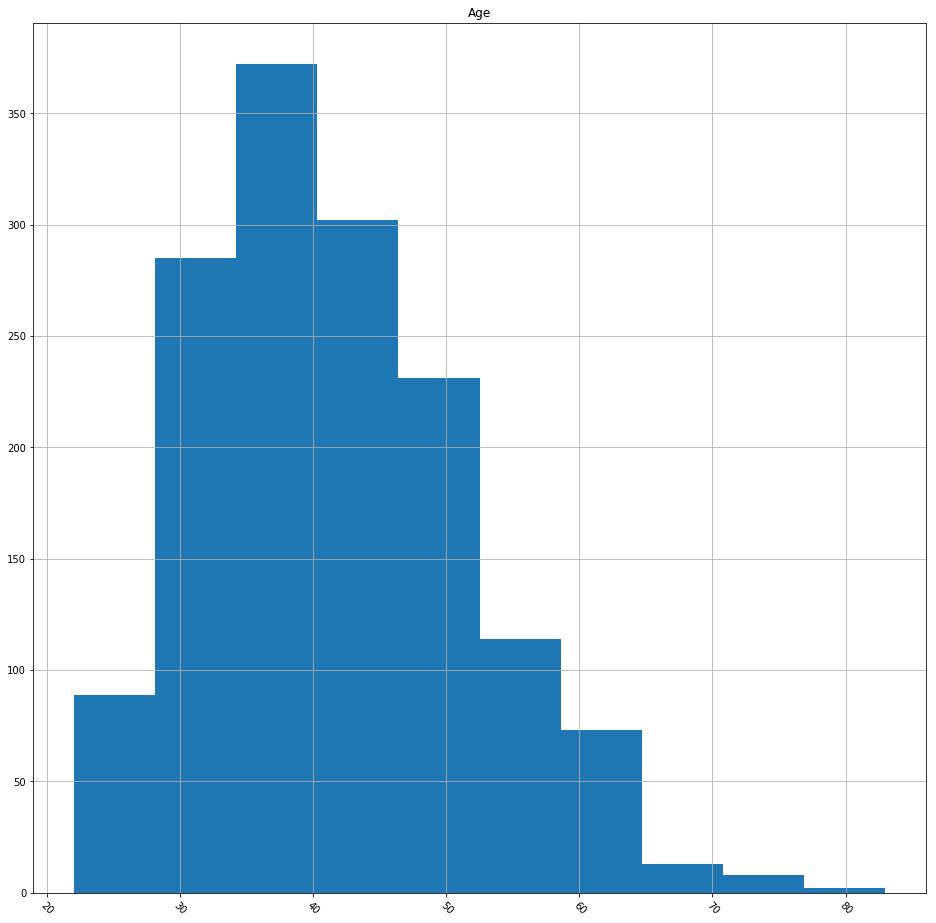

In [184]:
# Plot histogram grid
df.hist(figsize=(16,16), xrot=-45) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()


The next few cells are just peeking at the data in question. Scroll over if uninterested.

In [185]:
df.describe() #Here, I just want to look at the components of the data which I am interested in

,Age
count,1489.000000
mean,41.791807
std,9.676538
min,22.000000
25%,34.000000
50%,40.000000
75%,48.000000
max,83.000000


CORRELATIONS

In [187]:
df.corr()

,Age
Age,1.0


In [188]:
#gapminder[loc1,'continent'].value_counts()
df['Date'].value_counts().head()

12/09/1999    4
06/26/2007    3
08/30/2000    3
08/28/1987    3
03/15/2000    3
Name: Date, dtype: int64

In [189]:
#OLDEST PERSON EXECUTED OVERALL

oldest = df.max()

oldest

Date                                                     12/28/1984
Name                                                      Zane Hill
Age                                                              83
Sex                                                               m
Race                                                          White
Victim_Race_Sex     6 Black Male(s)1 White Female(s)1 White Male(s)
State                                                            WY
Region                                                            W
Method                                             Lethal Injection
Juvenile                                                        Yes
Federal                                                         Yes
Volunteer                                                       Yes
Foreign National                                                Yes
County                                                         Yuma
dtype: object

In [190]:
#df[df['A'].str.contains("hello")]
#SEARCH FOR PART OF NAME
name = df.loc[df['Name'].str.contains('Bundy')]
name

,Date,Name,Age,Sex,Race,Victim_Race_Sex,State,Region,Method,Juvenile,Federal,Volunteer,Foreign National,County
270,01/24/1989,Theodore Bundy,42,m,White,1 White Female(s),FL,S,Electrocution,No,No,No,No,Columbia


In [191]:
#SEARCH WHERE VICTIM(S) WERE FEMALE
victim = df.loc[df['Victim_Race_Sex'].str.contains("Female") == True]
victim.head()

,Date,Name,Age,Sex,Race,Victim_Race_Sex,State,Region,Method,Juvenile,Federal,Volunteer,Foreign National,County
0,01/10/1986,James Roach,25,m,White,1 White Male(s)1 White Female(s),SC,S,Electrocution,Yes,No,No,No,Richland
1,01/11/1985,Joseph Shaw,29,m,White,1 White Male(s)1 White Female(s),SC,S,Electrocution,No,No,No,No,Richland
4,01/06/1994,Keith Wells,31,m,White,1 White Male(s)1 White Female(s),ID,W,Lethal Injection,No,No,Yes,No,Ada
6,01/12/2000,Earl Heiselbertz,48,m,White,2 White Female(s),TX,S,Lethal Injection,No,No,No,No,Sabine
8,01/04/1985,David Martin,32,m,White,2 White Male(s)2 White Female(s),LA,S,Electrocution,No,No,No,No,Lafourche Parish


In [192]:
#SEARCH WHERE METHOD WAS ELECTROCUTION
elec = df.loc[df['Method'] == 'Electrocution']
elec.head()

,Date,Name,Age,Sex,Race,Victim_Race_Sex,State,Region,Method,Juvenile,Federal,Volunteer,Foreign National,County
0,01/10/1986,James Roach,25,m,White,1 White Male(s)1 White Female(s),SC,S,Electrocution,Yes,No,No,No,Richland
1,01/11/1985,Joseph Shaw,29,m,White,1 White Male(s)1 White Female(s),SC,S,Electrocution,No,No,No,No,Richland
8,01/04/1985,David Martin,32,m,White,2 White Male(s)2 White Female(s),LA,S,Electrocution,No,No,No,No,Lafourche Parish
14,01/09/1985,Roosevelt Green,28,m,Black,1 White Female(s),GA,S,Electrocution,No,No,No,No,Brooks
20,01/10/1997,Billy Waldrop,44,m,White,1 White Male(s),AL,S,Electrocution,No,No,No,No,Talladega


In [193]:
#SEARCH WHERE AGE = X, AND SEX = M/F
df_n = df.loc[df['Age'] > 61] [df['Sex'] == 'm']

df_n.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Date,Name,Age,Sex,Race,Victim_Race_Sex,State,Region,Method,Juvenile,Federal,Volunteer,Foreign National,County
103,05/02/1997,Walter Hill,62,m,Black,2 Black Male(s)1 Black Female(s),AL,S,Electrocution,No,No,No,No,Jefferson
111,05/05/1999,Clydell Coleman,62,m,Black,1 Black Female(s),TX,S,Lethal Injection,No,No,No,No,McLennan
190,07/02/2003,Hilton Crawford,64,m,White,1 White Male(s),TX,S,Lethal Injection,No,No,No,No,Montgomery
267,01/26/1984,Anthony Antone,66,m,White,1 White Male(s),FL,S,Electrocution,No,No,No,No,Hillsborough
297,01/24/2002,Ronald Spivey,62,m,White,1 White Male(s),GA,S,Lethal Injection,No,No,No,No,Muscogee


In [195]:
# AVERAGE OVERALL AGE
age_df = df.loc[df['Age']]
age_df.mean()

Age    37.876427
dtype: float64

MY APOLOGIES TO TEXAS, THEY ARE JUST AN EASY STATE TO PICK ON IN THIS CASE

In [196]:
#THE OLDEST PERSON EXECUTED IN TEXAS WAS

tx_df = df.loc[df['State']=='TX']
tx_df.max()

Date                      12/18/1986
Name                  Yosvanis Valle
Age                               67
Sex                                m
Race                           White
Victim_Race_Sex      4 White Male(s)
State                             TX
Region                             S
Method              Lethal Injection
Juvenile                         Yes
Federal                           No
Volunteer                        Yes
Foreign National                 Yes
County                          Wood
dtype: object

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

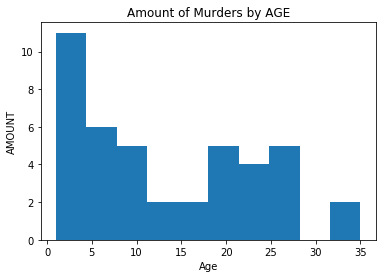

In [197]:
#tx_df.plot.hist(bins = 20)
#plt.title('AGE OF EXECUTED PEOPLE IN TEXAS')

tx_df['Age'].value_counts().plot(kind='hist')
plt.title('Amount of Murders by AGE')
plt.xlabel('Age')
plt.ylabel('AMOUNT')
sns.despine

In [198]:
#THE YOUNGEST PERSON EXECUTED IN TEXAS WAS

tx_df = df.loc[df['State']=='TX']
tx_df.min()

Date                       01/04/1995
Name                      Aaron Foust
Age                                24
Sex                                 f
Race                            Asian
Victim_Race_Sex     1 Asian Female(s)
State                              TX
Region                              S
Method               Lethal Injection
Juvenile                           No
Federal                            No
Volunteer                          No
Foreign National                   No
County                       Anderson
dtype: object

In [199]:
#Are there "Other" values in Race?

Race = df.loc[df['Race']=='Other']
Race

,Date,Name,Age,Sex,Race,Victim_Race_Sex,State,Region,Method,Juvenile,Federal,Volunteer,Foreign National,County
403,11/14/2002,Mir Aimal Kasi,38,m,Other,1 White Male(s),VA,S,Lethal Injection,No,No,No,Yes,Fairfax
411,12/06/2001,Sahib Al-Mosawi,53,m,Other,1 Other Male(s)1 Other Female(s),OK,S,Lethal Injection,No,No,No,Yes,Oklahoma


In [200]:
date_range = df.loc[df['State'] == 'TX']
date_range.head()

,Date,Name,Age,Sex,Race,Victim_Race_Sex,State,Region,Method,Juvenile,Federal,Volunteer,Foreign National,County
6,01/12/2000,Earl Heiselbertz,48,m,White,2 White Female(s),TX,S,Lethal Injection,No,No,No,No,Sabine
13,01/09/2001,Jack Clark,37,m,White,1 Latino Female(s),TX,S,Lethal Injection,No,No,No,No,Lubbock
15,01/07/1988,Robert Streetman,27,m,White,1 White Female(s),TX,S,Lethal Injection,No,No,No,No,Hardin
17,01/04/1995,Jesse Jacobs,44,m,White,1 White Female(s),TX,S,Lethal Injection,No,No,No,No,Montgomery
21,01/05/1999,John Moody,46,m,White,1 White Female(s),TX,S,Lethal Injection,No,No,No,No,Taylor


In [201]:
#ax = df.plot(kind='area', alpha=0.35, figsize=(10, 5), color = 'rgbkymc')

#ax.set_title('EXECUTION AGE AVG')
#ax.set_ylabel('AGE')
#ax.set_xlabel('BY STATE')

In [202]:
#df.plot(kind='bar', figsize=(10, 6))

#plt.xlabel('STATE') # add to x-label to the plot
#plt.ylabel('AGE') # add y-label to the plot
#plt.title('Executions by state') # add title to the plot

#plt.show()

A LINEAR REGRESSION MODEL SEEMS TO BE THE BEST APPROACH, SINCE WE ARE DEALING WITH PAST EVENTS

In [203]:
from sklearn.linear_model import LinearRegression
import sklearn
from sklearn.model_selection import train_test_split


In [204]:
reg = LinearRegression()

HERE, I HAVE TO DO SOME DATA CLEANING SINCE I CANNOT DROP CERTAIN VALUES, SUCH AS GENDER AND 
RACE.
HERE, WHITE = 1, BLACK = 2, Native American = 3, Latino = 4, Asian = 5

In [205]:
df.Sex.replace(['m', 'f'], [0, 1], inplace=True)
df.Race.replace(['White', 'Black','Native American','Latino','Asian','Other'], [1, 2, 3, 4, 5, 0], inplace=True)
#df.dropna(axis='columns')
#df.dropna()

In [206]:
train1 = df.drop(['Date','Name','State','Juvenile','Method','Victim_Race_Sex','Region','Federal','Volunteer','Foreign National','County'],axis=1)

In [207]:
labels = df['Sex']

In [208]:
x_train , x_test , y_train , y_test = train_test_split(train1, labels, test_size = 0.20,random_state =2)


STANDARDIZE TRAININING SET

In [209]:
train_mean = x_train.mean()
train_std = x_train.std()


In [210]:
## Standardize the train data set
x_train = (x_train - train_mean) / train_std

In [211]:
## Check for mean and std dev.
x_train.describe()

,Age,Sex,Race
count,1.191000e+03,1.191000e+03,1.191000e+03
mean,1.146112e-16,1.903972e-17,-2.889749e-18
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.021849e+00,-1.128911e-01,-7.074442e-01
25%,-7.947270e-01,-1.128911e-01,-7.074442e-01
50%,-7.890602e-02,-1.128911e-01,-7.074442e-01
75%,6.369150e-01,-1.128911e-01,3.997385e-01
max,4.216020e+00,8.850659e+00,3.721286e+00


In [212]:
## Note: We use train_mean and train_std_dev to standardize test data set
x_test = (x_test - train_mean) / train_std

In [213]:
## Predict Train results
y_train_pred = np.ones(y_train.shape[0])*y_train.mean()

In [214]:
## Predict Test results
y_pred = np.ones(y_test.shape[0])*y_train.mean()

In [215]:
#x_test.fillna(x_train.mean(), inplace=True)
#x_test = x_test.fillna(x_train.mean())
#x_test._is_view
x_test.fillna(x_test.mean()).head(10)

,Age,Sex,Race
786,-0.487947,-0.112891,0.399738
352,1.045956,-0.112891,-0.707444
916,0.534655,-0.112891,-0.707444
1430,-0.896987,-0.112891,-0.707444
68,0.023354,-0.112891,0.399738
745,-0.692467,-0.112891,0.399738
1269,-0.487947,-0.112891,0.399738
673,-1.306028,-0.112891,2.614104
1148,0.739175,-0.112891,-0.707444
45,-0.385686,-0.112891,1.506921


In [216]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [217]:
reg.score(x_test,y_test)

1.0

In [218]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [219]:
clf.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [220]:
clf.score(x_test,y_test)

0.9999923068226558

In [221]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [222]:
y_pred = reg.predict(x_test)

In [223]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [224]:
pca = PCA()

In [225]:
pca.fit_transform(scale(train1))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


array([[-7.36198313e-01,  5.81624685e-02, -1.72334371e+00],
       [-4.60895219e-01, -2.90106889e-02, -1.42737168e+00],
       [-1.24573365e+00,  5.31821389e-01,  2.35646534e+00],
       ...,
       [-2.17785690e-01, -1.88411823e-03,  3.76522728e-01],
       [-8.32779009e-01,  4.01061653e-01,  2.80042340e+00],
       [ 1.02107823e+00, -3.94163327e-01,  1.70839689e+00]])

In [227]:
df.corr()

,Age,Sex,Race
Age,1.000000,0.056787,-0.156485
Sex,0.056787,1.000000,-0.044266
Race,-0.156485,-0.044266,1.000000


In [228]:
print(df.corr)

<bound method DataFrame.corr of             Date               Name  Age  Sex  Race  \
0     01/10/1986        James Roach   25    0     1   
1     01/11/1985        Joseph Shaw   29    0     1   
2     01/08/1997          Paul Ruiz   49    0     4   
3     01/08/1997    Earl Van Denton   47    0     1   
4     01/06/1994        Keith Wells   31    0     1   
5     01/10/2000     Douglas Thomas   26    0     1   
6     01/12/2000   Earl Heiselbertz   48    0     1   
7     01/05/1993       Westley Dodd   31    0     1   
8     01/04/1985       David Martin   32    0     1   
9     01/09/2002      James Johnson   52    0     1   
10    01/08/1999      Ronnie Howard   40    0     2   
11    01/09/2001        Eddie Trice   48    0     2   
12    01/11/2001        Wanda Allen   41    1     2   
13    01/09/2001         Jack Clark   37    0     1   
14    01/09/1985    Roosevelt Green   28    0     2   
15    01/07/1988   Robert Streetman   27    0     1   
16    01/06/1989      George Merc

CONCLUSION:

I was unable to find a strong correlation between age, sex and race and those who die from the death penalty. I might find capital punishment objectionable, but using my above methods, the there does not appear to be a preferred "victim" of this. I would have to explore the data further to find any stronger links, and would have to include more data sets than used in this project.